<a href="https://colab.research.google.com/github/sandheepgopinath/NeuralNetworks/blob/master/TensorFlow%2C_Boston_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow.compat.v1 as tf

tf.reset_default_graph()

In [0]:
from tensorflow.python.keras.datasets import boston_housing
(features, actual_prices),_ = boston_housing.load_data(test_split=0)

In [16]:
print('There are ',features.shape[0],' rows and ',features.shape[1],' attributes')

There are  506  rows and  13  attributes


In [0]:
# Defining the place holders for input and output
x=tf.placeholder(shape=[None,13],dtype=tf.float32,name='input')
x_n=tf.layers.batch_normalization(x,training=True)
y=tf.placeholder(shape=[None],dtype=tf.float32,name='output')

In [0]:
# Initializing weights and Bias

W=tf.Variable(tf.zeros(shape=[13,1]),name='weights')
B=tf.Variable(tf.zeros(shape=[1]),name='bias')

In [0]:
#Results 

output=tf.add(tf.matmul(x_n,W),B,name='output')


In [0]:
#Loss

loss=tf.reduce_mean(tf.square(output-y),name='loss')

In [0]:
#Gradient Descent

gradientDescent=tf.train.GradientDescentOptimizer(0.03).minimize(loss)

In [0]:
#Now all the functions are initilized. The varibles are to be initialized before running the model. 
sess=tf.Session()
sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())

In [23]:
#Let us run the model for 100 epoch and note the result for every 5 epochs. 
import numpy as np
epoch=100
losses=np.zeros(20)
j=0

for i in range(0,epoch):
  _,train_loss=sess.run([gradientDescent,loss],feed_dict={x:features,y:actual_prices})
  if i%5==0:
    losses[j]=train_loss
    j=j+1
    print(train_loss)

sess.close()

592.147
357.88913
231.71223
163.55998
121.85424
87.67367
84.96785
84.64693
84.55524
84.51553
84.49233
84.4766
84.46514
84.456474
84.44973
84.4444
84.44013
84.43666
84.433846
84.431526


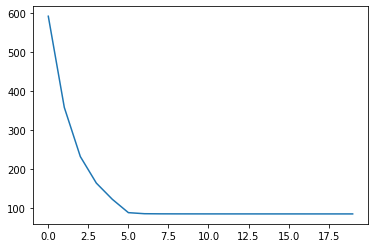

In [26]:
import matplotlib.pyplot as plt
plt.plot(losses)